In [3]:
import numpy as np
import pandas as pd
import random

df1=pd.read_csv("Table_1_1.csv")
df2=pd.read_csv("Table_1_2.csv")
df3=pd.read_csv("Table_2_1.csv")
df4=pd.read_csv("Table_2_2.csv")

In [4]:
#1.
df1=pd.merge(df1,df2,on="show_id")
df2=pd.merge(df3,df4,on="show_id")
df=pd.concat([df1,df2])

In [5]:
#2.
print('The number of records is', df.shape[0])

The number of records is 6234


In [6]:
#3.
df_mov=df.query("type == 'Movie'")                                            #Extract only the movie records
 
mov_us=df_mov[df_mov['country'].str.contains("United States")==True].shape[0] #Extract only the movie records in US
print('The number of movies is', df_mov.shape[0], "and the total number of those in United States is",mov_us)

The number of movies is 4265 and the total number of those in United States is 1924


In [7]:
#4.
lst_coun=df['country'].tolist() 

coun = [item for item in lst_coun if not(pd.isnull(item)) == True] #Deleting NaN values
coun = ",".join(coun)                                              
coun = coun.split(",")                                             #Create a list with all references of countries

output = []
for x in coun:
    if x not in output:
        output.append(x)
list_countries=output                                              #Unique list of countries

count_countries=[]
for i in range(0,len(list_countries)):
    elm_count= coun.count(list_countries[i])
    count_countries.append(elm_count)                              #Count the countries

    df_coun=pd.DataFrame(list(zip(list_countries,count_countries)),columns=['Countries','Counts'])#Create the DF with the Countries and their counts

    tot_coun= df_coun.sort_values(by='Counts', ascending=False)    #Sort the DataFrame
tot_coun.head(10)                                                  #Top 10 Countries 

,Countries,Counts
2,United States,2302
3,India,808
19,United Kingdom,483
10,United States,308
18,Canada,206
1,Japan,184
25,France,147
4,South Korea,146
22,Spain,139
14,France,124


In [8]:
#5.

nom = np.random.randint(0, 11, df.shape[0])
wins = []
for i in range(0,len(nom)):
    w=random.randint(0,nom[i])
    wins.append(w)

df['Nominations'] = pd.DataFrame({'Nominations': nom})
df['Wins'] = pd.DataFrame({'Wins': wins})

df.head()

,show_id,type,title,duration,country,director,cast,Nominations,Wins
0,80224924,Movie,Expedition China,78 min,NaN,Ben Wallis,Maggie Q,8,7
1,80149575,Movie,Caida del Cielo,78 min,Argentina,Néstor Sánchez Sotelo,"Muriel Santa Ana, Peto Menahem, Héctor Díaz, S...",2,0
2,80175822,TV Show,Blazing Transfer Students,1 Season,Japan,NaN,"Daiki Shigeoka, Akito Kiriyama, Junta Nakama, ...",6,0
3,80166467,TV Show,Ellen DeGeneres: Relatable,1 Season,United States,"Joel Gallen, Tig Notaro",Ellen DeGeneres,4,1
4,70123116,Movie,Agyaat,97 min,India,Ram Gopal Varma,"Adesh Bhardwaj, Rasika Dugal, Joy Fernandes, R...",3,2


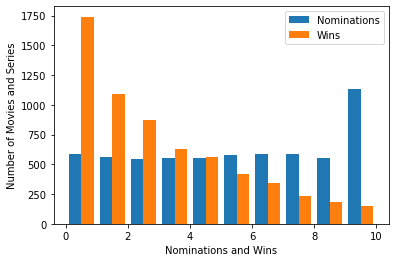

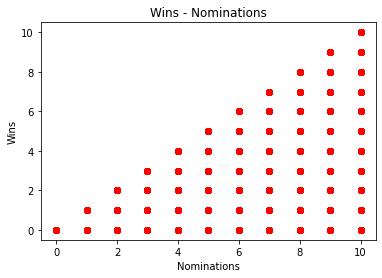

In [9]:
#6.
import matplotlib.pyplot as plt

plt.hist([nom, wins], 10, label=['Nominations', 'Wins']) #Histogram
plt.legend(loc='upper right')
plt.xlabel('Nominations and Wins') 
plt.ylabel('Number of Movies and Series')
#plt.title("Nominations and Wins")
plt.show()

plt.scatter(nom, wins, c ="red")                         #Scatter Plot
plt.xlabel('Nominations') 
plt.ylabel('Wins')
plt.title("Wins - Nominations")
plt.show()

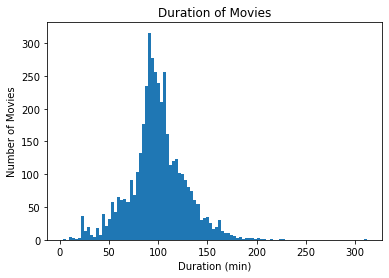

In [10]:
#7.
            
mov=df_mov['duration'].tolist()                 #Convert Dataframe column to list
mov_min = [x.replace('min','') for x in mov]    #Extract the term "min" from the list
for i in range(0, len(mov_min)): 
    mov_min[i] = int(mov_min[i])                #Turning Strings into Integers
    
plt.hist([mov_min], 100)                        #Histogram
plt.ylabel('Number of Movies') 
plt.xlabel('Duration (min)')
plt.title("Duration of Movies")
plt.show()

In [11]:
#8.
count = 0
for i in mov_min:
    if i>120:
        count += 1
print('The number of movies with duration larger than 120 minutes is', count)

The number of movies with duration larger than 120 minutes is 827


In [15]:
#9.
count = len([movie for movie in mov_min if movie > 130])
prob=count/len(mov_min)
prob

0.11770222743259086